# GeoPandas bug writing and reading GeoJSON files

NOTE: bug went away when I upgraded to GeoPandas 0.11.1 and numpy 1.22.3
    
Analyze error and workarounds for GeoPandas bug using GeoJSON files for plotting
- Bug description:  
    1. read Colorado SD shapefiles into gpd.DataFrame
    2. drop SD's outside Boulder County
    3. write boulder_sd to geojson file
    4. read boulder_sd from geojson file
    5. plot() throws hard error
- Workarounds
    - Write all SD's to geojson then filter out non-Boulder in Leaflet
        - Con: need boulder_sd.geojson for Leaflet.js
        - could use Folium to create Leaflet html file
- Started: August 13, 2022
- Updated:  


## Issues
- GeoPandas has a bug writing GeoJSON files then reading them in. 
- Plotting the Boulder County SD's results in a hard error
    - Read statewide SD Shapefile
    - drop SD's outside Boulder County
    - sd_boulder.plot() works
    - write Boulder SD's to GeoJSON file 
    .geojson then reading the .geojson
- The bug results in a hard error when trying to plot the GeoDataFrame

```
sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')
sd_boulder.to_file('data/sd_boulder.geojson', driver='GeoJSON')
sd_test_geojson = gpd.read_file('data/sd_boulder.geojson', driver='GeoJSON')

```

- No error if .plot aspect is manually set to 'equal' .plot(aspect='equal')
    - so error is in the aspect calculating functions
    - Aspect is normally calculated as aspect = ( 1 / cos( df_y * py/180 ) 
    - where df_y is y coordinate of middle of bounding box

## Setup
### Input Files
- SD Boundaries
    - Boulder County only - 3 SD's
        - data/sd_boulder.kml
- HD Boundaries
### Output Files
- GeoJSON files
    - SD boundaries
    - HD Boundaries

In [1]:
import pandas as pd
import geopandas as gpd
import fiona
# allow Fiona KML driver with rw permission
# gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

## show bug in writing then reading geojson files
- Read Shape with all Colorado SD's
- remove non-Boulder SD's
- plot works
- write Boulder SD to GeoJSON
- read sd_boulder.geojson
- error on plot

In [2]:
sds = gpd.read_file('data/sd/2021_Approved_Senate_Plan_w_Final_Adjustments.shp')

In [3]:
boulder_sds = [15, 17, 18]
sd_boulder = sds[sds.District.isin(boulder_sds)]

<AxesSubplot:>

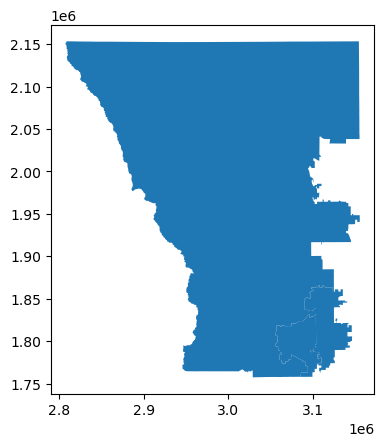

In [4]:
sd_boulder.plot()

In [5]:
# test writing then reading geojson
sd_boulder.to_file('data/sd_boulder.geojson', driver='GeoJSON')

In [6]:
# read Boulder only sd's from geojson file
sd_read_boulder_geojson = gpd.read_file('data/sd_boulder.geojson', driver='GeoJSON')

<AxesSubplot:>

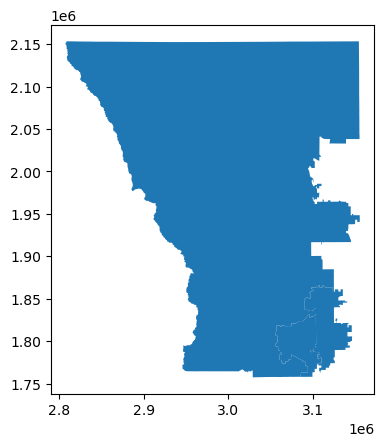

In [7]:
# sd_read_boulder_geojson.plot(aspect='equal')
sd_read_boulder_geojson.plot()

<AxesSubplot:>

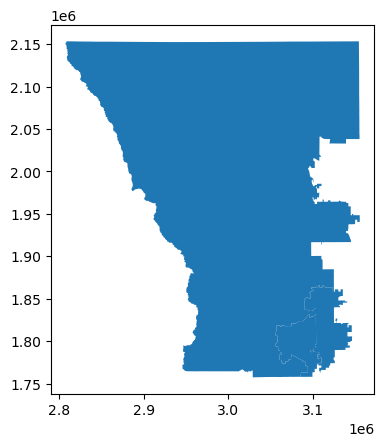

In [8]:
# ERROR on plot
# ValueError: 'box_aspect' and 'fig_aspect' must be positive
sd_read_boulder_geojson.plot()

## Test writing sd_boulder to shape file then reading

In [10]:
# test writing shape then reading geojsona
sd_boulder.to_file('data/sd_boulder.shp')

In [11]:
sd_boulder_from_shape = gpd.read_file('data/sd_boulder.shp')

In [12]:
sd_boulder_from_shape

,OBJECTID,District,Shape_Leng,Shape_Area,geometry
0,15,15,2.026107e+06,8.478371e+10,"POLYGON ((3074154.719 2153079.735, 3075494.444..."
1,17,17,5.060884e+05,2.993907e+09,"POLYGON ((3105763.453 1866020.998, 3107364.881..."
2,18,18,3.740253e+05,2.294499e+09,"POLYGON ((3095252.084 1831563.965, 3095255.733..."


<AxesSubplot:>

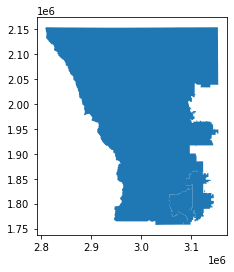

In [13]:
sd_boulder_from_shape.plot()

In [14]:
sd_boulder_from_shape.to_file('data/sd_boulder_from_shape.geojson', driver='GeoJSON')


C:\Users\BruceDev\miniconda3\envs\geo_ds\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [15]:
sd_boulder_rswgrg = gpd.read_file('data/sd_boulder_from_shape.geojson', driver='GeoJSON')

In [28]:
type(sd_boulder_rswgrg)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

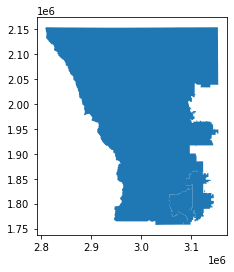

In [19]:
sd_boulder_rswgrg.plot(aspect=1)

## Test each SD alone


In [29]:
sd_boulder_rswgrg_0 = gpd.GeoDataFrame( sd_boulder_rswgrg.loc[0])

In [30]:
type(sd_boulder_rswgrg_0)


geopandas.geodataframe.GeoDataFrame

In [32]:
sd_boulder_rswgrg_0

,0
OBJECTID,15
District,15
Shape_Leng,2026106.541
Shape_Area,84783713943.699997
geometry,"POLYGON ((3074154.718907282 2153079.734825656,..."


AttributeError: No geometry data set yet (expected in column 'geometry'.)

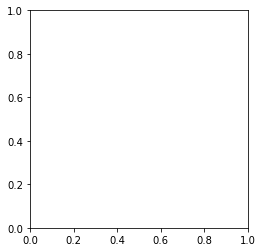

In [33]:
sd_boulder_rswgrg_0.plot()

## HD - State House District Boundaries
- KML works
    - reading externally created KML file works!!
    - can read kml file with just Boulder HD's
    - no drops of hd required

In [8]:
hd_boulder = gpd.read_file('data/hd_boulder.kml', driver='KML')
hd_boulder

,Name,Description,geometry
0,District 10,D10,"POLYGON ((-105.23552 40.04903, -105.23601 40.0..."
1,District 11,D11,"POLYGON ((-105.17158 40.13063, -105.17342 40.1..."
2,District 12,D12,"POLYGON ((-105.21602 40.06186, -105.21556 40.0..."
3,District 19,D19,"POLYGON ((-105.10304 40.03661, -105.10275 40.0..."
4,District 49,D49,"POLYGON ((-105.70079 39.87893, -105.70078 39.8..."


<AxesSubplot:>

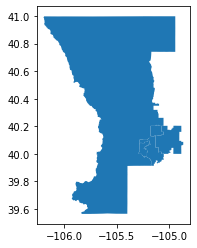

In [9]:
hd_boulder.plot()

In [10]:
hd_boulder.to_file('data/hd_boulder.geojson', driver='GeoJSON')


C:\Users\BruceDev\miniconda3\envs\geo_ds\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

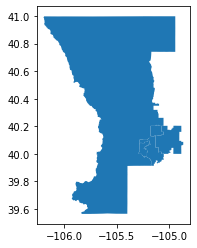

In [11]:
hd_test_geojson = gpd.read_file('data/hd_boulder.geojson', driver='GeoJSON')
hd_test_geojson.plot()